In [1]:
import networkx as nx   
import matplotlib.pyplot as plt  
from pyoxigraph import *
import chromadb
from pprint import pprint
from embedding_pipeline import *
from utils import get_descendents, get_subclasses, get_complement, get_dom_ran

/home/kipp_sa/github/EmbedAlign/embed/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file = "/home/kipp_sa/github/EmbedAlign/test/bfo-core.owl"
store = Store()
store.load(path = file, format = RdfFormat.RDF_XML)

Client = chromadb.Client()
label_collection = Client.get_or_create_collection(name="labels")
structure_collection = Client.get_or_create_collection(name = "Structure")

In [7]:
class_bindings = get_classes(store)
for c in class_bindings:
    pprint(c)

class retrieval: 0.0008513927459716797
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000203',
 'label': 'temporal instant',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000148']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000202',
 'label': 'temporal interval',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000038']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000182',
 'label': 'history',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000015']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000148',
 'label': 'zero-dimensional temporal region',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000008']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000147',
 'label': 'fiat point',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000140']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000146',
 'label': 'fiat surface',
 'parents': ['http://purl.obolibrary.org/obo/BFO_0000140']}
{'iri': 'http://purl.obolibrary.org/obo/BFO_0000145',
 'label': 'relational quality',
 'parents': [

In [8]:
prop_bindings = get_object_properties(store)
pprint(prop_bindings)

prop retrieval: 0.0006783008575439453
[{'dom': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000008>],
  'label': 'has last instant',
  'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000224>,
  'ran': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000203>]},
 {'dom': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000203>],
  'label': 'last instant of',
  'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000223>,
  'ran': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000008>]},
 {'dom': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000008>],
  'label': 'has first instant',
  'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000222>,
  'ran': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000203>]},
 {'dom': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000203>],
  'label': 'first instant of',
  'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000221>,
  'ran': [<NamedNode value=http://pu

In [9]:
for p in prop_bindings:
    print(p["node"].value)
    dom = p["dom"]
    
    for d in p["dom"]:
        dom.extend(get_dom_ran(p["dom"], store))
  
    print(dom)

http://purl.obolibrary.org/obo/BFO_0000224


TypeError: 'NoneType' object is not iterable

In [ ]:
props = set_prop_dom_ran(prop_bindings, store = store)
pprint(props)

pop time = 0.0008213520050048828
[{'dom': None,
  'label': 'has last instant',
  'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000224>,
  'ran': None},
 {'dom': None,
  'label': 'last instant of',
  'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000223>,
  'ran': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000038>,
          <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000202>,
          <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000148>,
          <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000203>]},
 {'dom': [<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000038>,
          <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000202>,
          <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000148>,
          <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000203>],
  'label': 'has first instant',
  'node': <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000222>,
  'ran': None},
 {'dom': None,
  

In [ ]:
def hierarchy_pos(G, root, width=1.0, vert_gap=0.2, vert_loc=0, xcenter=0.5):
    '''
    If G is a tree, this will return a dict of positions for a hierarchical layout.

    G: the graph (must be a tree)
    root: the root node
    width: horizontal space allocated for this branch
    vert_gap: gap between levels
    vert_loc: vertical location of root
    xcenter: horizontal location of root
    '''
    def _hierarchy_pos(G, root, left, right, vert_loc, pos=None, parent=None):
        if pos is None:
            pos = {}
        pos[root] = ((left + right) / 2, vert_loc)
        neighbors = list(G.neighbors(root))
        if parent:
            neighbors = [n for n in neighbors if n != parent]
        if neighbors:
            dx = (right - left) / len(neighbors)
            nextx = left
            for neighbor in neighbors:
                next_right = nextx + dx
                pos = _hierarchy_pos(G, neighbor, nextx, next_right, vert_loc - vert_gap, pos, root)
                nextx += dx
        return pos

    return _hierarchy_pos(G, root, 0, width, vert_loc)

core graph creation : 0.00019979476928710938


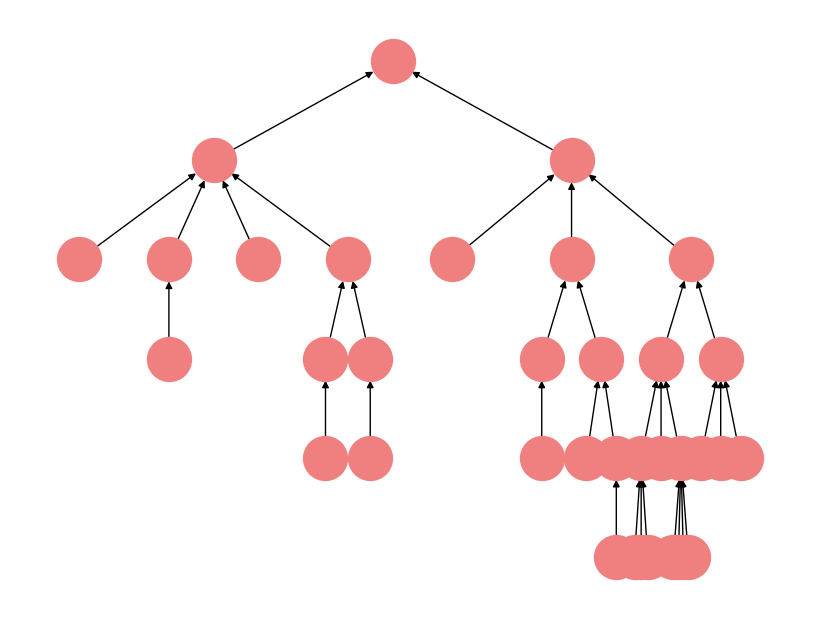

In [ ]:
graph = create_core_graph(class_bindings)
sinks = [n for n, d in graph.out_degree() if d == 0]
if len(sinks) != 1:
    raise ValueError("Graph must have exactly one sink node")
sink = sinks[0]
G_rev = graph.reverse()
pos = hierarchy_pos(G_rev, root=sink)

# Plot the original graph (with original direction), but using reversed layout
plt.figure(figsize=(8, 6))
nx.draw(graph, pos=pos, with_labels=False, arrows=True, node_color="lightcoral", node_size=1000)
plt.show()

dom-ran-graph creation : 0.0001571178436279297


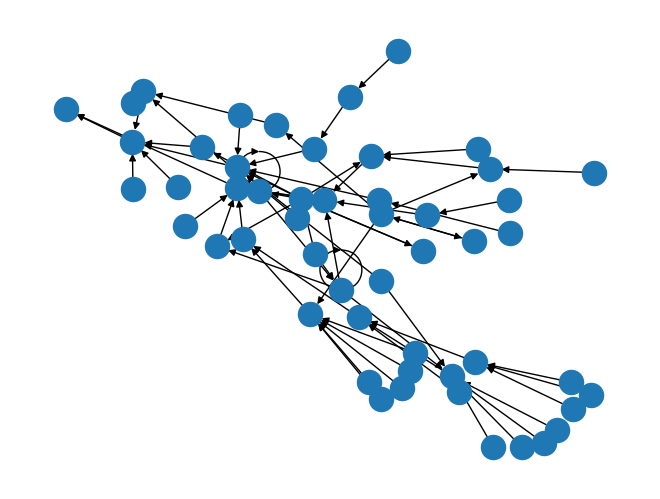

In [ ]:
full = create_dom_ran_graph(graph, prop_bindings)
nx.draw(full)

## TEST WITH BLANKNODES

In [ ]:
test_prop = NamedNode("http://purl.obolibrary.org/obo/BFO_0000057")
from RDFS import RDFS
quads = list(store.quads_for_pattern(test_prop, RDFS.range, None, None))
ran = quads[0].object


In [ ]:
from utils import pop_blank
result = pop_blank(ran, store)
print(result)

[<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000020>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000031>, <BlankNode value=c05812db0730fc9833f0548a981840e0>]


In [ ]:
next_blank = BlankNode("c05812db0730fc9833f0548a981840e0")
result = pop_blank(next_blank, store)
print(result)

[<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000004>, <BlankNode value=f12e22ee02b9bd8456cf0707d7e347dc>]


In [ ]:
next_blank = BlankNode("f12e22ee02b9bd8456cf0707d7e347dc")
result = pop_blank(next_blank, store)
print(result)

[<NamedNode value=http://purl.obolibrary.org/obo/BFO_0000203>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000202>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000182>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000148>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000147>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000146>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000145>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000142>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000141>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000140>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000040>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000038>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000035>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000034>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000031>, <NamedNode value=http://purl.obolibrary.org/obo/BFO_0000030>, <NamedN

In [ ]:
from Classes import ComplexClass

test = ComplexClass(ran, store)
for nodes in test.tree:
    print(nodes)

<http://www.w3.org/2002/07/owl#unionOf>
http://purl.obolibrary.org/obo/BFO_0000020
http://purl.obolibrary.org/obo/BFO_0000031
<http://www.w3.org/2002/07/owl#intersectionOf>
http://purl.obolibrary.org/obo/BFO_0000004
<http://www.w3.org/2002/07/owl#complementOf>
http://purl.obolibrary.org/obo/BFO_0000006
